In [16]:
# Import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Datas given in the problem.

amount_of_purchase = [40,50,60,70,80,90,100]
cost = 0.33
price = 0.50
scrap = 0.05

In [18]:
# Import the table which we created in the "0_TableStructure" file.

df = pd.read_csv("Demands.csv",index_col="Day")

In [19]:
# Create a dictionary which contain average daily profits corresponding to amounth of purchased newspaper.

average_daily_profits = {} 


for purchase in amount_of_purchase:
    
    # Calculate revenue from sales

    df.loc[ purchase >= df["Demand"], "Revenue From Sales"] = df["Demand"]*price
    df.loc[ purchase < df["Demand"], "Revenue From Sales"] = purchase*price

    # Calculate lost profit from excess demand 

    df.loc[ purchase < df["Demand"], "Loss Profit From Excess Demand"] = (df["Demand"] - purchase)*(price-cost)
    df.loc[ purchase >= df["Demand"], "Loss Profit From Excess Demand"] = 0

    # Calculate salvage from sale of scrap

    df.loc[ purchase > df["Demand"], "Salvage From Sale of Scrap"] = (purchase-df["Demand"])* scrap
    df.loc[ purchase <= df["Demand"], "Salvage From Sale of Scrap"] = 0

    # Calculate daily profit

    df["Daily Profit"] = df["Revenue From Sales"]+df["Salvage From Sale of Scrap"]-df["Loss Profit From Excess Demand"]-(purchase*cost)
    
    # Calculate average daily profit
    
    average_daily_profits[purchase] = df["Daily Profit"].mean()

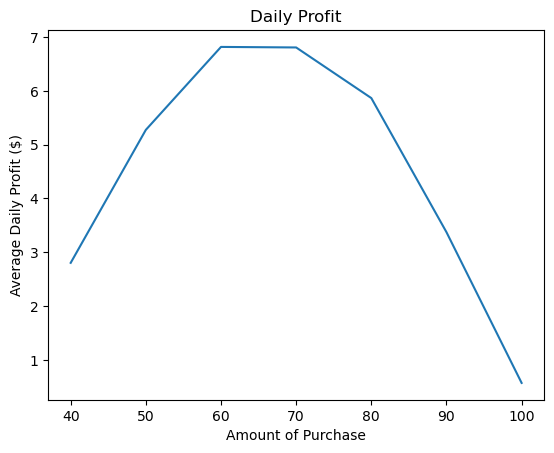

In [20]:
# Create a line chart to see the best amount of newspaper.

plt.plot(average_daily_profits.keys(),average_daily_profits.values())

plt.title("Daily Profit")
plt.xlabel("Amount of Purchase")
plt.ylabel("Average Daily Profit ($)")


plt.savefig("DailyProfit -AmountOfPurchase")
plt.show()